In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.getcwd()

'C:\\Users\\up332\\Desktop\\My Data'

In [127]:
L = 1;
x = np.linspace(0,1,6)
n=len(x) +1
h = x[1]-x[0]
print (h,n)
k = 0.1; #A = 0.01
#a = k*A/h; sp = -2*a
#print(a,sp)
phin=np.zeros(n-2);phi=np.zeros(n-2); D = np.zeros(n); F = np.zeros(n);sp=np.zeros(n);su=np.zeros(n);aw=np.zeros(n);
ae=np.zeros(n)
u=0.2; 
phi[0]=1;phi[-1]=0; rho=1
F=rho*u; D = k/h; #Fe=rho*u; Fw = rho*u;
#De = k/h; Dw=k/h
sp[1] = -((2*D)+F); sp[-2]=-((2*D)-F); su[1] = (2*D+F)*phi[0]; su[-2]=(2*D+F)*phi[-1]
aw[:]=D +(F/2); ae[:] = D - (F/2); 
aw[1]=0;ae[-2]=0;#sp = -((2*D)+F)
ap=aw+ae-sp
#print(sp,su,aw,ae,F,D,ap)
l=-aw[1:-1]; d= ap[1:-1]; u=-ae[1:-1]; b=su[1:-1]
print(l,d,u,b)
n1=n-2;
phiA=1;phiB=0
T=np.zeros(n-2)

0.2 7
[-0.  -0.6 -0.6 -0.6 -0.6] [1.6 1.  1.  1.  1.4] [-0.4 -0.4 -0.4 -0.4 -0. ] [1.2 0.  0.  0.  0. ]


In [128]:
def tdma(l,d,u,b,n):
    
    g=np.zeros(n); h=np.zeros(n); sol=np.zeros(n);
    g[0]=d[0]; h[0]=b[0]
    for i in range(n):
        if i>0:
            g[i]=d[i]-l[i]*u[i-1]/g[i-1]
            h[i]=b[i]-l[i]*h[i-1]/g[i-1]
    sol[-1]=h[-1]/g[-1];
    i=n-2
    while i>=0:
        
        sol[i]=(h[i]-u[i]*sol[i+1])/g[i]
        i-=1
    #print('\nsol is---\n',sol)
    
    return(sol)

In [129]:
phi[:] = tdma(l,d,u,b,n1)                        
print(phi)

[0.96966825 0.87867299 0.74218009 0.53744076 0.23033175]


In [139]:
#exact soln
y=[0.2,0.6,1,1.4,1.8] 
x=[0.2,0.4,0.6,0.8,1]
T = 1 - ( (np.exp((y)) - 1)/(np.exp(2) - 1) )
#T = (2.7183 - np.exp(x))/1.7183
print(T)

[0.96534656 0.8713239  0.73105858 0.5218073  0.20964108]


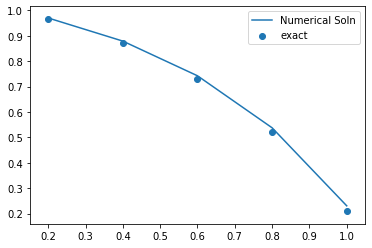

In [141]:
plt.plot(x,phi,label='Numerical Soln')
plt.scatter(x,T,label='exact')
plt.legend()